In [51]:
from tiingo import TiingoClient as client
import pandas as pd
import backtrader as bt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
client = client({'api_key': '5fc020666c7e26bf87f6f33578322e28dd6e8e49' })#
df = client.get_dataframe('AAPL', startDate="12-5-2020")
df.to_csv('AAPL_tiingo_data.csv')
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2020-12-07 00:00:00+00:00,123.75,124.57,122.25,122.31,86711990,120.731669,121.531669,119.268255,119.326792,86711990,0.0,1.0
2020-12-08 00:00:00+00:00,124.38,124.98,123.09,124.37,82225512,121.346303,121.931669,120.087767,121.336547,82225512,0.0,1.0
2020-12-09 00:00:00+00:00,121.78,125.95,121.00,124.53,115089193,118.809719,122.878010,118.048743,121.492645,115089193,0.0,1.0
2020-12-10 00:00:00+00:00,123.24,123.87,120.15,120.50,81312170,120.234108,120.848742,117.219475,117.560939,81312170,0.0,1.0
2020-12-11 00:00:00+00:00,122.41,122.76,120.55,122.43,86939786,119.424353,119.765816,117.609719,119.443865,86939786,0.0,1.0


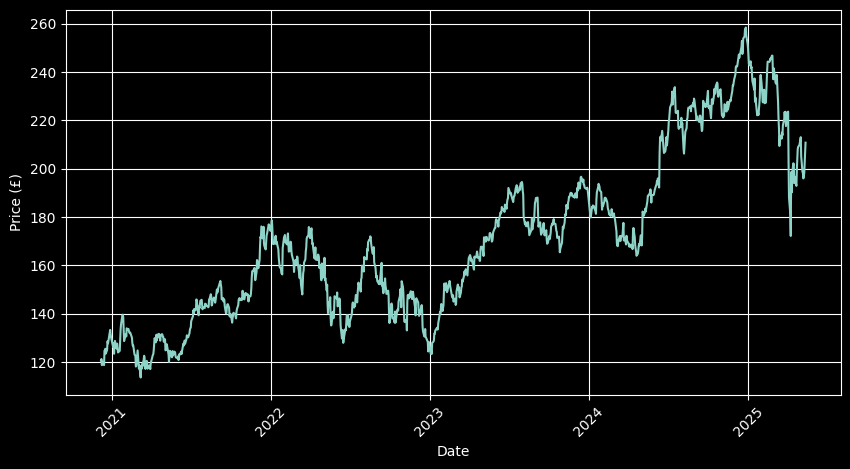

In [80]:
df = pd.read_csv('AAPL_tiingo_data.csv', parse_dates=['date'])

plt.figure(figsize=(10, 5))
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.style.use('dark_background')
plt.plot(df['date'], df['adjClose'])
plt.ylabel('Price (£)')
plt.xlabel('Date')

plt.xticks(rotation=45)

plt.show()

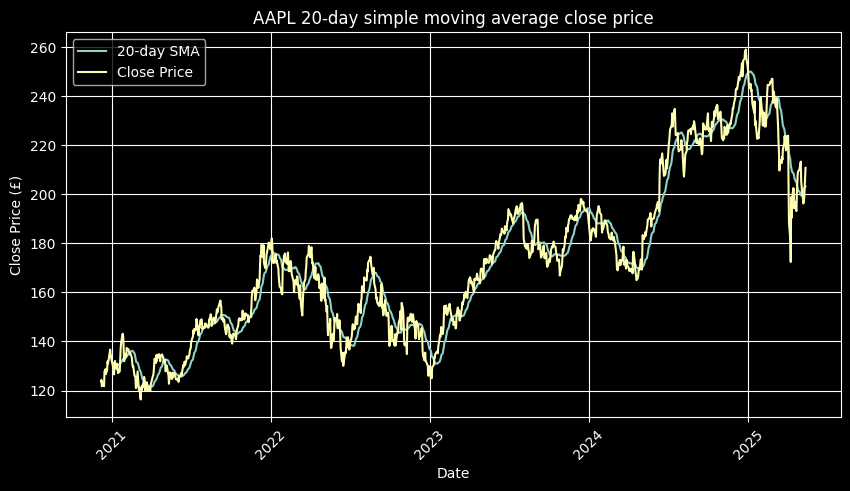

In [81]:
df = pd.read_csv('AAPL_tiingo_data.csv', parse_dates=['date']) #Read the saved .csv file
df["SMA20"] = df["close"].rolling(window=20).mean()     #Define SMA20 as the mean of 20 consecutive close prices



plt.figure(figsize = (10,5))
plt.plot(df.date, df['SMA20'], label=("20-day SMA"))        #Plot of 20-day mean alongside close price versus time
plt.plot(df.date, df['close'], label="Close Price")
plt.ylabel('Close Price (£)')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.title('AAPL 20-day simple moving average close price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Monthly tick locator
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format: Month Year (e.g., 'Jan 2024')

# Rotate the labels for better readability
plt.xticks(rotation=45)
plt.show()


In [91]:
df.dropna
class PandasData(bt.feeds.PandasData):
    params = (
        ('datetime', 'date'),
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        
    )

class SMA_crossover(bt.Strategy):
    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=20)  # 20-day SMA
    def next(self):
        if self.data.close[0] < self.sma[0]:
            if not self.position:
                self.buy()                                #Defining the strategy, buying low and selling high.
        elif self.data.close[0] > self.sma[0]:
            if self.position:
                self.sell()

In [116]:
cerebro = bt.Cerebro() #Cerebro Class gathers inputs and analysers
data = PandasData(dataname=df)
cerebro.addstrategy(SMA_crossover)   #Adding my strategy into Cerebro
bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)

# Set initial cash
cerebro.broker.setcash(10000.0)
print('Initial Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run backtest
results = cerebro.run()

# Plot result
cerebro.plot()
strat = results[0]

Initial Portfolio Value: 10000.00


<IPython.core.display.Javascript object>

In [117]:
strat = results[0]
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())



Final Portfolio Value: 10005.64
